In [3]:
#Load dataset
import pandas as pd
df = pd.read_csv('../dataset/ml.csv')

# Prepare for Creating Deep Machine

In [4]:
df['Protocol'].unique() #Find Uniqie Protocol for the next label2id

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [5]:
df = pd.get_dummies(df)#Use One-hot coding to convert categorical variables to dummy variables.

df_label = df['label']#get label and save
del df['label']#delete label
df.head()

pktcount  bytecount  dur   dur_nsec       tot_dur  flows  packetins  \
0     45304   48294064  100  716000000  1.010000e+11      3       1943   
1    126395  134737070  280  734000000  2.810000e+11      2       1943   
2     90333   96294978  200  744000000  2.010000e+11      3       1943   
3     90333   96294978  200  744000000  2.010000e+11      3       1943   
4     90333   96294978  200  744000000  2.010000e+11      3       1943   

   pktperflow  byteperflow  pktrate  Pairflow   tx_bytes  rx_bytes  tx_kbps  \
0       13535     14428310      451         0  143928631      3917        0   
1       13531     14424046      451         0       3842      3520        0   
2       13534     14427244      451         0       3795      1242        0   
3       13534     14427244      451         0       3688      1492        0   
4       13534     14427244      451         0       3413      3665        0   

   rx_kbps  tot_kbps  Protocol_ICMP  Protocol_TCP  Protocol_UDP  
0      0.0       0.0          False         False          True  
1      0.0       0.0          False         False          True  
2      0.0       0.0          False         False          True  
3      0.0       0.0          False         False          True  
4      0.0       0.0          False         False          True

In [6]:
from sklearn.preprocessing import MinMaxScaler # Min-Max scaling scales the original data linearly into a specified interval [a,b].
scaler = MinMaxScaler()

df_std= scaler.fit_transform(df)
df_std

array([[1.74242133e-01, 3.28245224e-01, 5.31632111e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.86123397e-01, 9.15781280e-01, 1.48856991e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.47426598e-01, 6.54497966e-01, 1.06326422e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.19228018e-04, 2.06486866e-05, 1.64805954e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.19228018e-04, 2.06486866e-05, 1.64805954e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.19228018e-04, 2.06486866e-05, 1.64805954e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [7]:
# Put the result obtained from the original data in Min-Max to the original position.
new_df = pd.DataFrame(df_std, columns=df.columns)
new_df.head()

pktcount  bytecount       dur  dur_nsec   tot_dur     flows  packetins  \
0  0.174242   0.328245  0.053163  0.716717  0.053723  0.066667   0.076883   
1  0.486123   0.915781  0.148857  0.734735  0.149468  0.000000   0.076883   
2  0.347427   0.654498  0.106326  0.744745  0.106915  0.066667   0.076883   
3  0.347427   0.654498  0.106326  0.744745  0.106915  0.066667   0.076883   
4  0.347427   0.654498  0.106326  0.744745  0.106915  0.066667   0.076883   

   pktperflow  byteperflow  pktrate  Pairflow      tx_bytes      rx_bytes  \
0    0.962331     0.996744  0.96243       0.0  1.133295e-01  3.090061e-06   
1    0.962304     0.996717  0.96243       0.0  1.035450e-06  2.689292e-06   
2    0.962324     0.996737  0.96243       0.0  9.984414e-07  3.896647e-07   
3    0.962324     0.996737  0.96243       0.0  9.141880e-07  6.420382e-07   
4    0.962324     0.996737  0.96243       0.0  6.976491e-07  2.835669e-06   

   tx_kbps  rx_kbps  tot_kbps  Protocol_ICMP  Protocol_TCP  Protocol_UDP  
0      0.0      0.0       0.0            0.0           0.0           1.0  
1      0.0      0.0       0.0            0.0           0.0           1.0  
2      0.0      0.0       0.0            0.0           0.0           1.0  
3      0.0      0.0       0.0            0.0           0.0           1.0  
4      0.0      0.0       0.0            0.0           0.0           1.0

In [8]:
# add new column
new_df['class'] = df_label

In [9]:
#get unique label
new_df['class'].unique()

array([0, 1], dtype=int64)

In [10]:
import sklearn.model_selection as ms

#Divide training set Test set Validation set
X = new_df.iloc[:,:-1].astype(float)
y = new_df.iloc[:,-1]
X_train, X_dev, y_train, y_dev = ms.train_test_split(X, y, test_size=0.15, random_state=64)

train = X_train.copy()
train['label'] = y_train

dev = X_dev.copy()
dev['label']= y_dev

In [11]:
X_train, X_test, y_train, y_test = ms.train_test_split(train.iloc[:,:-1], train.iloc[:,-1], test_size=0.15, random_state=64)

train = X_train.copy()
train['label'] = y_train

test = X_test.copy()
test['label']= y_test

In [12]:
test

pktcount  bytecount       dur  dur_nsec   tot_dur     flows  packetins  \
90134  0.000046   0.000008  0.006911  0.007007  0.006919  0.600000   0.119627   
92307  0.179050   0.329708  0.091972  0.009009  0.092021  0.200000   0.118676   
66944  0.003527   0.000611  0.499734  0.009009  0.500000  0.066667   0.081642   
55872  0.003111   0.000539  0.440191  0.498498  0.440426  0.333333   0.094607   
95273  0.001658   0.000287  0.234450  0.908909  0.235106  0.466667   0.049960   
...         ...        ...       ...       ...       ...       ...        ...   
63334  0.032334   0.059541  0.015417  0.649650  0.015771  0.266667   0.073156   
18550  0.126839   0.238946  0.038809  0.326326  0.039003  0.000000   0.042902   
45640  0.000077   0.000013  0.011164  0.058058  0.011201  0.066667   0.000238   
37496  0.197434   0.020237  0.088783  0.240240  0.088830  0.200000   0.428747   
80381  0.031249   0.062478  0.010101  0.149149  0.010186  0.066667   0.293299   

       pktperflow  byteperflow   pktrate  Pairflow      tx_bytes  \
90134    0.872171     0.907347  0.872302       1.0  2.135112e-01   
92307    0.928992     0.962418  0.929057       1.0  2.290746e-05   
66944    0.872365     0.907365  0.872302       1.0  2.622090e-06   
55872    0.872371     0.907365  0.872502       1.0  5.913560e-05   
95273    0.872365     0.907365  0.872302       0.0  1.678767e-06   
...           ...          ...       ...       ...           ...   
63334    0.872171     0.907347  0.872302       1.0  1.977197e-06   
18550    0.962864     0.997272  0.962830       0.0  6.267818e-07   
45640    0.872171     0.907347  0.872302       1.0  2.204760e-06   
37496    0.931170     0.910530  0.931255       1.0  2.222083e-06   
80381    0.872171     0.907347  0.872302       1.0  2.419098e-01   

           rx_bytes   tx_kbps   rx_kbps  tot_kbps  Protocol_ICMP  \
90134  2.716336e-01  0.000097  0.000121  0.000194            1.0   
92307  4.909425e-02  0.000000  0.142426  0.114723            1.0   
66944  1.367471e-01  0.000000  0.000000  0.000000            1.0   
55872  7.382429e-05  0.000049  0.000060  0.000097            1.0   
95273  6.420382e-07  0.000000  0.000000  0.000000            1.0   
...             ...       ...       ...       ...            ...   
63334  8.995280e-03  0.000000  0.143331  0.115452            1.0   
18550  2.483355e-07  0.000000  0.000000  0.000000            0.0   
45640  4.513447e-06  0.000000  0.000000  0.000000            1.0   
37496  5.511837e-07  0.000000  0.000000  0.000000            0.0   
80381  3.008881e-02  0.004956  0.153526  0.128620            0.0   

       Protocol_TCP  Protocol_UDP  label  
90134           0.0           0.0      0  
92307           0.0           0.0      1  
66944           0.0           0.0      0  
55872           0.0           0.0      0  
95273           0.0           0.0      0  
...             ...           ...    ...  
63334           0.0           0.0      1  
18550           0.0           1.0      0  
45640           0.0           0.0      0  
37496           1.0           0.0      1  
80381           1.0           0.0      1  

[13240 rows x 20 columns]

## Standard DataLoader and Dataset

In [13]:
import numpy as np
from torch.utils.data import Dataset, DataLoader

#Create Dataset and DataLoader
class TrafficDataset(Dataset):
    def __init__(self, path, test=False, transform=None, download=False):
        self.data,self.targets = self._read_file(path,test)

    def _read_file(self, path,test):
        if test == False:
            images = path.iloc[:, :-1].values.astype('float32')
            labels = path.iloc[:, -1].values
        else:
            images = path.iloc[:, :-1].values.astype('float32')
            labels = np.array([0]*len(path)).astype('int64')
        return images, labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img, target = self.data[index], int(self.targets[index])
        
        return img, target

batch_size = 64
train_dataset = TrafficDataset(path=train)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

dev_dataset = TrafficDataset(path=dev)
dev_loader = DataLoader(dataset=dev_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TrafficDataset(path=test,test = True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [15]:
#Get the number of data in each batch
len(train_dataset[0][0])

19

In [16]:
#use cuda if it has else use cpu to run
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Create Our Own Model

In [17]:
import torch  
import torch.nn as nn  
import torch.nn.functional as F  
  
class MyModel(nn.Module):  
    def __init__(self):  
        super(MyModel, self).__init__()  
        self.layer1 = nn.Linear(19, 64)  
        self.layer2 = nn.Linear(64, 512)  
        self.layer3 = nn.BatchNorm1d(512)  
        self.layer4 = nn.Dropout(0.5)  
        self.layer5 = nn.Linear(512, 64)  
        self.layer6 = nn.BatchNorm1d(64)  
        self.layer7 = nn.Dropout(0.5)  
        self.layer8 = nn.Linear(64, 32)  
        self.layer9 = nn.Linear(32, 2)  # Output layer modified to be 2-categorical  
        self.layer10 = nn.LogSoftmax(dim=1)  # Output layer for 2 classification 
  
    def forward(self, x):  
        x = F.relu(self.layer1(x))  
        x = F.relu(self.layer2(x))  
        x = self.layer3(x)  
        x = self.layer4(x)  
        x = F.relu(self.layer5(x))  
        x = self.layer6(x)  
        x = self.layer7(x)  
        x = F.relu(self.layer8(x))  
        x = self.layer9(x)  # Output layer modified to 2 categorical  
        x = self.layer10(x)  # Applying the LogSoftmax activation function  
        return x  
  
mymodel = MyModel().to(device)

In [18]:
print(mymodel) #print the strcture of mymodel

MyModel(
  (layer1): Linear(in_features=19, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=512, bias=True)
  (layer3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer4): Dropout(p=0.5, inplace=False)
  (layer5): Linear(in_features=512, out_features=64, bias=True)
  (layer6): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer7): Dropout(p=0.5, inplace=False)
  (layer8): Linear(in_features=64, out_features=32, bias=True)
  (layer9): Linear(in_features=32, out_features=2, bias=True)
  (layer10): LogSoftmax(dim=1)
)


## CrossEntropy Loss and Optimizer

In [19]:
import torch.optim as optim

params = mymodel.parameters()

criterion = nn.CrossEntropyLoss() #load criterion
optimizer = torch.optim.Adam(params,lr=0.0001) #load optimizer
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1) #Learning rate decays to 1/10 of original every 7 epochs

## Accuracy

In [20]:
#Define a function to calculate its accuracy
def accuracy(predictions, labels):
    pred = torch.max(predictions.data, 1)[1] 
    rights = pred.eq(labels.data.view_as(pred)).sum() 
    return rights, len(labels) 

In [21]:
import copy
import time
#train model
def train_model(model, epoch, optimizer=optimizer, filename='mymodel_best.pth'):
    b = time.time()
    best_acc = 0
    LRs = [optimizer.param_groups[0]['lr']]
    best_model_wts = copy.deepcopy(model.state_dict())
    
    # Store a list of training and validation metrics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epoch):
        train_rights = []
        train_loss = 0.0

        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            model.train()
            output = model(data)
            loss = criterion(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            right = accuracy(output, target)
            train_rights.append(right)
            train_loss += loss.item()

            if batch_idx % 100 == 0:
                model.eval()
                val_rights = []
                val_loss = 0.0

                for (data, target) in dev_loader:
                    data, target = data.to(device), target.to(device)
                    output = model(data)
                    loss = criterion(output, target)
                    val_loss += loss.item()
                    right = accuracy(output, target)
                    val_rights.append(right)

                # calculate accuracy
                train_r = (sum([tup[0] for tup in train_rights]), sum([tup[1] for tup in train_rights]))
                val_r = (sum([tup[0] for tup in val_rights]), sum([tup[1] for tup in val_rights]))

                train_losses.append(train_loss / len(train_loader))
                train_accuracies.append(100 * train_r[0] / train_r[1])
                val_losses.append(val_loss / len(dev_loader))
                val_accuracies.append(100 * val_r[0] / val_r[1])

                epoch_acc = val_accuracies[-1]
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    state = {
                        'state_dict': model.state_dict(),
                        'best_acc': best_acc,
                        'optimizer': optimizer.state_dict(),
                    }
                    torch.save(state, filename)

                print('current epoch: {} [{}/{} ({:.0f}%)]\tloss: {:.6f}\t train accuracy: {:.2f}%\t dev accuracy: {:.2f}%'.format(
                    epoch,
                    batch_idx * batch_size,
                    len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    train_loss / (batch_idx + 1),
                    100 * train_r[0] / train_r[1],
                    100 * val_r[0] / val_r[1]))
    
    model.load_state_dict(best_model_wts)
    res_time = time.time()-b
    return res_time, model, train_losses, train_accuracies, val_losses, val_accuracies

use_time,model, train_losses, train_accuracies, val_losses, val_accuracies = train_model(mymodel, epoch=30)

current epoch: 0 [0/75023 (0%)]	loss: 0.673934	 train accuracy: 57.81%	 dev accuracy: 60.85%
current epoch: 0 [6400/75023 (9%)]	loss: 0.608187	 train accuracy: 64.84%	 dev accuracy: 73.81%
current epoch: 0 [12800/75023 (17%)]	loss: 0.561498	 train accuracy: 68.42%	 dev accuracy: 74.93%
current epoch: 0 [19200/75023 (26%)]	loss: 0.530719	 train accuracy: 70.51%	 dev accuracy: 76.10%
current epoch: 0 [25600/75023 (34%)]	loss: 0.506809	 train accuracy: 72.15%	 dev accuracy: 80.68%
current epoch: 0 [32000/75023 (43%)]	loss: 0.485398	 train accuracy: 73.75%	 dev accuracy: 85.27%
current epoch: 0 [38400/75023 (51%)]	loss: 0.466961	 train accuracy: 75.05%	 dev accuracy: 89.72%
current epoch: 0 [44800/75023 (60%)]	loss: 0.449869	 train accuracy: 76.33%	 dev accuracy: 89.97%
current epoch: 0 [51200/75023 (68%)]	loss: 0.433283	 train accuracy: 77.55%	 dev accuracy: 91.35%
current epoch: 0 [57600/75023 (77%)]	loss: 0.418076	 train accuracy: 78.58%	 dev accuracy: 91.83%
current epoch: 0 [64000/750

current epoch: 7 [6400/75023 (9%)]	loss: 0.115982	 train accuracy: 94.74%	 dev accuracy: 95.52%
current epoch: 7 [12800/75023 (17%)]	loss: 0.116810	 train accuracy: 94.79%	 dev accuracy: 95.35%
current epoch: 7 [19200/75023 (26%)]	loss: 0.116329	 train accuracy: 94.72%	 dev accuracy: 95.43%
current epoch: 7 [25600/75023 (34%)]	loss: 0.117097	 train accuracy: 94.66%	 dev accuracy: 95.58%
current epoch: 7 [32000/75023 (43%)]	loss: 0.117963	 train accuracy: 94.60%	 dev accuracy: 95.37%
current epoch: 7 [38400/75023 (51%)]	loss: 0.118850	 train accuracy: 94.58%	 dev accuracy: 95.47%
current epoch: 7 [44800/75023 (60%)]	loss: 0.119033	 train accuracy: 94.56%	 dev accuracy: 95.66%
current epoch: 7 [51200/75023 (68%)]	loss: 0.117708	 train accuracy: 94.61%	 dev accuracy: 95.54%
current epoch: 7 [57600/75023 (77%)]	loss: 0.116442	 train accuracy: 94.66%	 dev accuracy: 95.61%
current epoch: 7 [64000/75023 (85%)]	loss: 0.115603	 train accuracy: 94.68%	 dev accuracy: 95.69%
current epoch: 7 [7040

current epoch: 14 [6400/75023 (9%)]	loss: 0.091879	 train accuracy: 95.81%	 dev accuracy: 96.38%
current epoch: 14 [12800/75023 (17%)]	loss: 0.094769	 train accuracy: 95.59%	 dev accuracy: 96.46%
current epoch: 14 [19200/75023 (26%)]	loss: 0.096349	 train accuracy: 95.59%	 dev accuracy: 96.28%
current epoch: 14 [25600/75023 (34%)]	loss: 0.096295	 train accuracy: 95.65%	 dev accuracy: 96.40%
current epoch: 14 [32000/75023 (43%)]	loss: 0.095439	 train accuracy: 95.68%	 dev accuracy: 96.49%
current epoch: 14 [38400/75023 (51%)]	loss: 0.094790	 train accuracy: 95.73%	 dev accuracy: 96.56%
current epoch: 14 [44800/75023 (60%)]	loss: 0.094995	 train accuracy: 95.70%	 dev accuracy: 96.62%
current epoch: 14 [51200/75023 (68%)]	loss: 0.095800	 train accuracy: 95.67%	 dev accuracy: 96.62%
current epoch: 14 [57600/75023 (77%)]	loss: 0.096062	 train accuracy: 95.66%	 dev accuracy: 96.48%
current epoch: 14 [64000/75023 (85%)]	loss: 0.095839	 train accuracy: 95.68%	 dev accuracy: 96.60%
current epoc

current epoch: 21 [6400/75023 (9%)]	loss: 0.092521	 train accuracy: 95.68%	 dev accuracy: 96.73%
current epoch: 21 [12800/75023 (17%)]	loss: 0.087274	 train accuracy: 95.93%	 dev accuracy: 96.80%
current epoch: 21 [19200/75023 (26%)]	loss: 0.088279	 train accuracy: 95.98%	 dev accuracy: 96.73%
current epoch: 21 [25600/75023 (34%)]	loss: 0.087457	 train accuracy: 96.08%	 dev accuracy: 96.91%
current epoch: 21 [32000/75023 (43%)]	loss: 0.086217	 train accuracy: 96.14%	 dev accuracy: 96.96%
current epoch: 21 [38400/75023 (51%)]	loss: 0.086162	 train accuracy: 96.14%	 dev accuracy: 96.93%
current epoch: 21 [44800/75023 (60%)]	loss: 0.085904	 train accuracy: 96.13%	 dev accuracy: 96.79%
current epoch: 21 [51200/75023 (68%)]	loss: 0.084934	 train accuracy: 96.18%	 dev accuracy: 96.94%
current epoch: 21 [57600/75023 (77%)]	loss: 0.085757	 train accuracy: 96.16%	 dev accuracy: 96.92%
current epoch: 21 [64000/75023 (85%)]	loss: 0.085703	 train accuracy: 96.17%	 dev accuracy: 96.84%
current epoc

current epoch: 28 [6400/75023 (9%)]	loss: 0.078681	 train accuracy: 96.63%	 dev accuracy: 97.26%
current epoch: 28 [12800/75023 (17%)]	loss: 0.074785	 train accuracy: 96.73%	 dev accuracy: 97.39%
current epoch: 28 [19200/75023 (26%)]	loss: 0.072554	 train accuracy: 96.83%	 dev accuracy: 97.43%
current epoch: 28 [25600/75023 (34%)]	loss: 0.072749	 train accuracy: 96.83%	 dev accuracy: 97.36%
current epoch: 28 [32000/75023 (43%)]	loss: 0.072611	 train accuracy: 96.78%	 dev accuracy: 97.23%
current epoch: 28 [38400/75023 (51%)]	loss: 0.072734	 train accuracy: 96.78%	 dev accuracy: 97.30%
current epoch: 28 [44800/75023 (60%)]	loss: 0.073166	 train accuracy: 96.74%	 dev accuracy: 97.39%
current epoch: 28 [51200/75023 (68%)]	loss: 0.073477	 train accuracy: 96.74%	 dev accuracy: 97.28%
current epoch: 28 [57600/75023 (77%)]	loss: 0.073655	 train accuracy: 96.73%	 dev accuracy: 97.28%
current epoch: 28 [64000/75023 (85%)]	loss: 0.073956	 train accuracy: 96.74%	 dev accuracy: 97.41%
current epoc

In [22]:
use_time

178.60980486869812

## Cuda to List

In [23]:
def tensor2list(content):
    return [content[i].cpu().numpy().tolist() for i in range(len(content))]

my_train_accuracy = tensor2list(train_accuracies)
my_val_accuracy = tensor2list(val_accuracies)
my_train_losses, my_val_losses = train_losses, val_losses

## Predict data

In [37]:
res = []
b = time.time()
for data,_ in test_loader:
    data, _ = data.to(device), _.to(device)
    outputs = mymodel(data)
    _,predicted = torch.max(outputs.data,1)
    res.extend(predicted.tolist())
print(time.time()-b)

0.25658750534057617


## confusion_matrix and classification_report

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

act_label = test.iloc[:,-1].tolist() #get actual label
print(classification_report(act_label,res)) #print classification report

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      8049
           1       0.95      0.97      0.96      5191

    accuracy                           0.97     13240
   macro avg       0.96      0.97      0.96     13240
weighted avg       0.97      0.97      0.97     13240



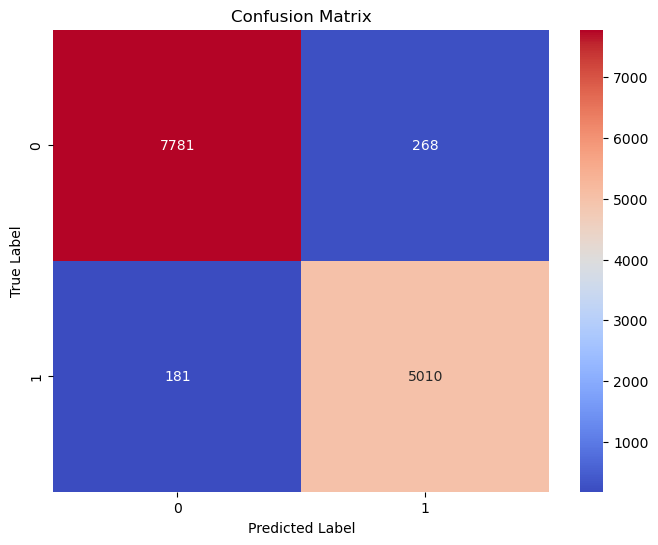

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

#confusion matrix
plt.figure(figsize=(8, 6))
labels = ['0','1']
confusion_mat = confusion_matrix(act_label,res)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='coolwarm',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

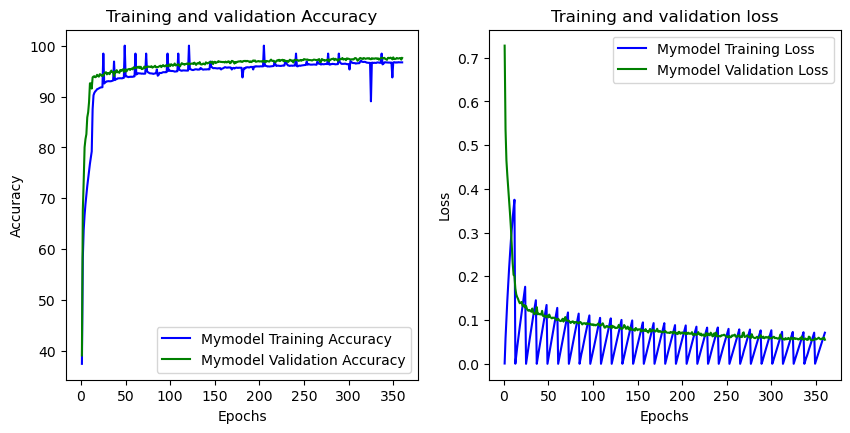

In [27]:
import matplotlib.pyplot as plt
epochs = range(1, len(train_losses) + 1) 

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax1.plot(epochs, my_train_accuracy, 'blue',label='Mymodel Training Accuracy')
ax1.plot(epochs,my_val_accuracy, 'green', label='Mymodel Validation Accuracy')
ax1.set_title('Training and validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2 = fig.add_subplot(2,2,2)
ax2.plot(epochs, my_train_losses, 'blue',label='Mymodel Training Loss')
ax2.plot(epochs,my_val_losses, 'green', label='Mymodel Validation Loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.savefig('../picture/Mymodel_loss_train.png')

# LSTM Model

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

class MyLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(MyLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        batch_size = x.size(0)  # 
        hx = torch.zeros(self.num_layers,self.hidden_size).to(x.device)
        cx = torch.zeros(self.num_layers,self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (hx, cx))
        out = self.fc(out[:, :])  
        out = self.softmax(out)
        return out

    
lstm = MyLSTM(input_size=19, hidden_size=128, num_layers=2,num_classes=2).to(device)

In [28]:
def accuracy(predictions, labels):
    pred = torch.max(predictions.data, 1)[1] 
    rights = pred.eq(labels.data.view_as(pred)).sum() 
    return rights, len(labels) 

## CrossEntropyLoss and Optimizer

In [29]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


params = lstm.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params,lr=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1) #学习率每7个epoch衰减成原来的1/10

## Train Process

In [30]:
import copy
def train_model(model, epoch, optimizer=optimizer, filename='best.pth'):
    b = time.time()
    best_acc = 0
    LRs = [optimizer.param_groups[0]['lr']]
    best_model_wts = copy.deepcopy(model.state_dict())
    
    # Store a list of training and validation metrics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epoch):
        train_rights = []
        train_loss = 0.0

        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            model.train()
            output = model(data)
            loss = criterion(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            right = accuracy(output, target)
            train_rights.append(right)
            train_loss += loss.item()

            if batch_idx % 100 == 0:
                model.eval()
                val_rights = []
                val_loss = 0.0

                for (data, target) in dev_loader:
                    data, target = data.to(device), target.to(device)
                    output = model(data)
                    loss = criterion(output, target)
                    val_loss += loss.item()
                    right = accuracy(output, target)
                    val_rights.append(right)

                # accuracy
                train_r = (sum([tup[0] for tup in train_rights]), sum([tup[1] for tup in train_rights]))
                val_r = (sum([tup[0] for tup in val_rights]), sum([tup[1] for tup in val_rights]))

                train_losses.append(train_loss / len(train_loader))
                train_accuracies.append(100 * train_r[0] / train_r[1])
                val_losses.append(val_loss / len(dev_loader))
                val_accuracies.append(100 * val_r[0] / val_r[1])

                epoch_acc = val_accuracies[-1]
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    state = {
                        'state_dict': model.state_dict(),
                        'best_acc': best_acc,
                        'optimizer': optimizer.state_dict(),
                    }
                    torch.save(state, filename)

                print('current epoch: {} [{}/{} ({:.0f}%)]\tloss: {:.6f}\t train accuracy: {:.2f}%\t dev accuracy: {:.2f}%'.format(
                    epoch,
                    batch_idx * batch_size,
                    len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    train_loss / (batch_idx + 1),
                    100 * train_r[0] / train_r[1],
                    100 * val_r[0] / val_r[1]))
    
    model.load_state_dict(best_model_wts)
    use_time = time.time() - b
    return use_time,model, train_losses, train_accuracies, val_losses, val_accuracies

use_time,res, lstm_train_losses, lstm_train_accuracies, lstm_val_losses, lstm_val_accuracies = train_model(lstm, epoch=30)

current epoch: 0 [0/75023 (0%)]	loss: 0.689954	 train accuracy: 56.25%	 dev accuracy: 60.85%
current epoch: 0 [6400/75023 (9%)]	loss: 0.676943	 train accuracy: 60.35%	 dev accuracy: 60.85%
current epoch: 0 [12800/75023 (17%)]	loss: 0.672813	 train accuracy: 60.62%	 dev accuracy: 60.85%
current epoch: 0 [19200/75023 (26%)]	loss: 0.669085	 train accuracy: 61.20%	 dev accuracy: 60.85%
current epoch: 0 [25600/75023 (34%)]	loss: 0.667687	 train accuracy: 61.33%	 dev accuracy: 60.85%
current epoch: 0 [32000/75023 (43%)]	loss: 0.666778	 train accuracy: 61.25%	 dev accuracy: 60.85%
current epoch: 0 [38400/75023 (51%)]	loss: 0.664072	 train accuracy: 61.28%	 dev accuracy: 60.85%
current epoch: 0 [44800/75023 (60%)]	loss: 0.659890	 train accuracy: 61.35%	 dev accuracy: 59.29%
current epoch: 0 [51200/75023 (68%)]	loss: 0.656128	 train accuracy: 61.21%	 dev accuracy: 59.95%
current epoch: 0 [57600/75023 (77%)]	loss: 0.652551	 train accuracy: 61.21%	 dev accuracy: 61.59%
current epoch: 0 [64000/750

current epoch: 7 [6400/75023 (9%)]	loss: 0.477139	 train accuracy: 85.41%	 dev accuracy: 85.29%
current epoch: 7 [12800/75023 (17%)]	loss: 0.477070	 train accuracy: 85.59%	 dev accuracy: 86.16%
current epoch: 7 [19200/75023 (26%)]	loss: 0.477391	 train accuracy: 85.65%	 dev accuracy: 86.13%
current epoch: 7 [25600/75023 (34%)]	loss: 0.476882	 train accuracy: 85.83%	 dev accuracy: 84.66%
current epoch: 7 [32000/75023 (43%)]	loss: 0.477256	 train accuracy: 85.66%	 dev accuracy: 84.53%
current epoch: 7 [38400/75023 (51%)]	loss: 0.476929	 train accuracy: 85.67%	 dev accuracy: 79.11%
current epoch: 7 [44800/75023 (60%)]	loss: 0.476165	 train accuracy: 85.75%	 dev accuracy: 85.92%
current epoch: 7 [51200/75023 (68%)]	loss: 0.474919	 train accuracy: 85.90%	 dev accuracy: 85.00%
current epoch: 7 [57600/75023 (77%)]	loss: 0.474533	 train accuracy: 85.94%	 dev accuracy: 87.20%
current epoch: 7 [64000/75023 (85%)]	loss: 0.473248	 train accuracy: 86.11%	 dev accuracy: 85.82%
current epoch: 7 [7040

current epoch: 14 [6400/75023 (9%)]	loss: 0.414623	 train accuracy: 90.47%	 dev accuracy: 89.82%
current epoch: 14 [12800/75023 (17%)]	loss: 0.414599	 train accuracy: 90.51%	 dev accuracy: 90.18%
current epoch: 14 [19200/75023 (26%)]	loss: 0.415487	 train accuracy: 90.38%	 dev accuracy: 90.24%
current epoch: 14 [25600/75023 (34%)]	loss: 0.415097	 train accuracy: 90.39%	 dev accuracy: 90.15%
current epoch: 14 [32000/75023 (43%)]	loss: 0.415600	 train accuracy: 90.34%	 dev accuracy: 90.04%
current epoch: 14 [38400/75023 (51%)]	loss: 0.415671	 train accuracy: 90.30%	 dev accuracy: 90.31%
current epoch: 14 [44800/75023 (60%)]	loss: 0.415950	 train accuracy: 90.26%	 dev accuracy: 90.32%
current epoch: 14 [51200/75023 (68%)]	loss: 0.415849	 train accuracy: 90.29%	 dev accuracy: 89.97%
current epoch: 14 [57600/75023 (77%)]	loss: 0.415962	 train accuracy: 90.28%	 dev accuracy: 90.41%
current epoch: 14 [64000/75023 (85%)]	loss: 0.415470	 train accuracy: 90.34%	 dev accuracy: 90.32%
current epoc

current epoch: 21 [6400/75023 (9%)]	loss: 0.393826	 train accuracy: 91.92%	 dev accuracy: 92.23%
current epoch: 21 [12800/75023 (17%)]	loss: 0.393098	 train accuracy: 92.12%	 dev accuracy: 92.28%
current epoch: 21 [19200/75023 (26%)]	loss: 0.393811	 train accuracy: 92.08%	 dev accuracy: 92.26%
current epoch: 21 [25600/75023 (34%)]	loss: 0.393120	 train accuracy: 92.13%	 dev accuracy: 92.39%
current epoch: 21 [32000/75023 (43%)]	loss: 0.394019	 train accuracy: 92.04%	 dev accuracy: 92.39%
current epoch: 21 [38400/75023 (51%)]	loss: 0.394663	 train accuracy: 91.98%	 dev accuracy: 92.42%
current epoch: 21 [44800/75023 (60%)]	loss: 0.394180	 train accuracy: 92.02%	 dev accuracy: 92.21%
current epoch: 21 [51200/75023 (68%)]	loss: 0.393145	 train accuracy: 92.14%	 dev accuracy: 92.51%
current epoch: 21 [57600/75023 (77%)]	loss: 0.392836	 train accuracy: 92.17%	 dev accuracy: 92.49%
current epoch: 21 [64000/75023 (85%)]	loss: 0.392475	 train accuracy: 92.20%	 dev accuracy: 92.12%
current epoc

current epoch: 28 [6400/75023 (9%)]	loss: 0.384017	 train accuracy: 92.74%	 dev accuracy: 93.18%
current epoch: 28 [12800/75023 (17%)]	loss: 0.382890	 train accuracy: 92.88%	 dev accuracy: 90.54%
current epoch: 28 [19200/75023 (26%)]	loss: 0.383599	 train accuracy: 92.79%	 dev accuracy: 93.07%
current epoch: 28 [25600/75023 (34%)]	loss: 0.381789	 train accuracy: 93.01%	 dev accuracy: 92.98%
current epoch: 28 [32000/75023 (43%)]	loss: 0.381588	 train accuracy: 93.04%	 dev accuracy: 92.97%
current epoch: 28 [38400/75023 (51%)]	loss: 0.381610	 train accuracy: 93.03%	 dev accuracy: 93.35%
current epoch: 28 [44800/75023 (60%)]	loss: 0.381201	 train accuracy: 93.06%	 dev accuracy: 93.20%
current epoch: 28 [51200/75023 (68%)]	loss: 0.380854	 train accuracy: 93.08%	 dev accuracy: 92.98%
current epoch: 28 [57600/75023 (77%)]	loss: 0.380650	 train accuracy: 93.11%	 dev accuracy: 93.25%
current epoch: 28 [64000/75023 (85%)]	loss: 0.380264	 train accuracy: 93.15%	 dev accuracy: 92.67%
current epoc

In [31]:
#Get the time for model training
use_time

167.02485370635986

In [32]:
def tensor2list(content):
    return [content[i].cpu().numpy().tolist() for i in range(len(content))]
lstm_train_accuracies = tensor2list(lstm_train_accuracies)
lstm_val_accuracies = tensor2list(lstm_val_accuracies)

In [33]:
len(lstm_val_losses)

360

## Predict

In [36]:
b = time.time()
res = []
for data,_ in test_loader:
    data, _ = data.to(device), _.to(device)
    outputs = lstm(data)
    _,predicted = torch.max(outputs.data,1)
    res.extend(predicted.tolist())
print(time.time()-b)

0.44493770599365234


## Classification Report and Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

act_label = test.iloc[:,-1].tolist()
print(classification_report(act_label,res))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8049
           1       0.90      0.94      0.92      5191

    accuracy                           0.94     13240
   macro avg       0.93      0.94      0.94     13240
weighted avg       0.94      0.94      0.94     13240



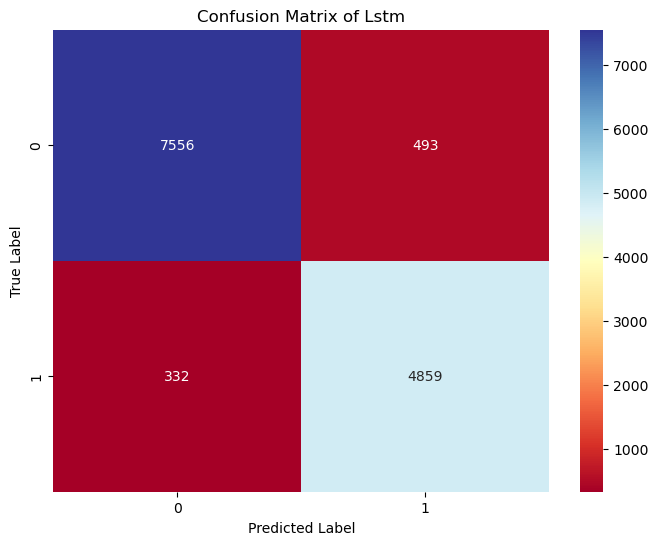

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#confusion matrix
plt.figure(figsize=(8, 6))
labels = ['0','1']
confusion_mat = confusion_matrix(act_label,res)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='RdYlBu',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Lstm')
plt.show()

## Accuracy and Loss Curve

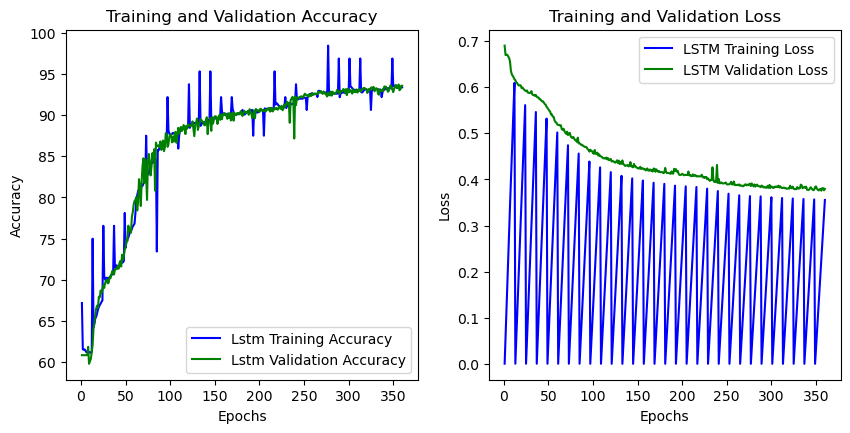

In [27]:
import matplotlib.pyplot as plt
epochs = range(1, len(lstm_train_losses) + 1) 

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax1.plot(epochs, lstm_train_accuracies, 'blue',label='Lstm Training Accuracy')
ax1.plot(epochs,lstm_val_accuracies, 'green', label='Lstm Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2 = fig.add_subplot(2,2,2)
ax2.plot(epochs, lstm_train_losses, 'blue',label='LSTM Training Loss')
ax2.plot(epochs,lstm_val_losses, 'green', label='LSTM Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.savefig('../picture/Lstm_loss_train.png')